In [ ]:
import numpy as numpy
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dropout, Dense, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar_10 = tf.keras.datasets.cifar10
(X_train,y_train), (X_test,y_test) = cifar_10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
print(f"X_train shape : {X_train.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_test shape : {y_test.shape}")

170498071/170498071 [==============================] - 5s 0us/step
X_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
X_test shape : (10000, 32, 32, 3)
y_test shape : (10000, 1)


Our input layer accepts our y layers to be vectors.So we flatten our y_test and y_train


In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

y_train shape : (50000,)
y_test shape : (10000,)


In [ ]:
K = len(set(y_test))
print(f"Number of classes:{K}")



Number of classes:10


In [ ]:
i =  Input(shape = (32,32,3),) # (32,32,3)  = X_train[0].shape
x =  Conv2D(filters=32, kernel_size=(3,3), strides=(2,2),activation="relu")(i)
x =  Conv2D(filters=64, kernel_size=(3,3), strides=(2,2),activation="relu")(x)
x =  Conv2D(filters=128, kernel_size=(3,3), strides=(2,2),activation="relu")(x)
x =  Flatten()(x)
x=   Dropout(0.5)(x)
x =  Dense(1024,activation="relu")(x)
x =  Dropout(0.2)(x)
x =  Dense(K,activation = "softmax")(x)

model = Model(i,x)

In [ ]:
model.compile(
  optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"]
)

r = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 10s 5ms/step - loss: 1.5893 - accuracy: 0.4183 - val_loss: 1.3320 - val_accuracy: 0.5268
Epoch 2/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2995 - accuracy: 0.5311 - val_loss: 1.1223 - val_accuracy: 0.5913
Epoch 3/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1616 - accuracy: 0.5835 - val_loss: 1.0503 - val_accuracy: 0.6287
Epoch 4/15
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0775 - accuracy: 0.6142 - val_loss: 1.0019 - val_accuracy: 0.6441
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0000 - accuracy: 0.6439 - val_loss: 0.9387 - val_accuracy: 0.6752
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9335 - accuracy: 0.6675 - val_loss: 0.9211 - val_accuracy: 0.6772
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8866 - accuracy: 0.6839 - val_loss: 0.9181 - val_accuracy

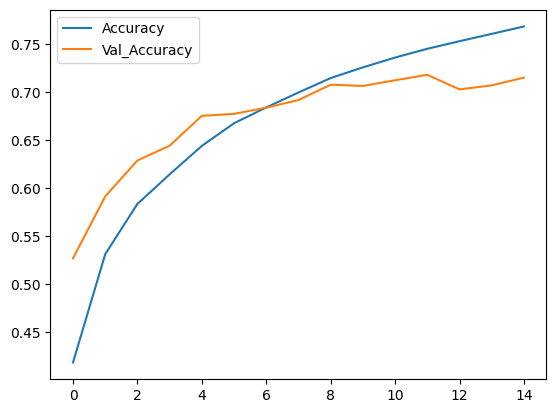

In [ ]:
from matplotlib import pyplot as plt

plt.plot(r.history["accuracy"],label="Accuracy")
plt.plot(r.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

In [ ]:
p_test = model.predict(X_test).argmax(axis=1) # argmax(1) allows you to choose the max value in the line so other 9 columns can be eliminated
print(p_test.shape)
print(y_test.shape)

313/313 [==============================] - 1s 2ms/step
(10000,)
(10000,)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

5797


Text(0.5, 1.0, 'Predicted: frog, Actual class: dog')

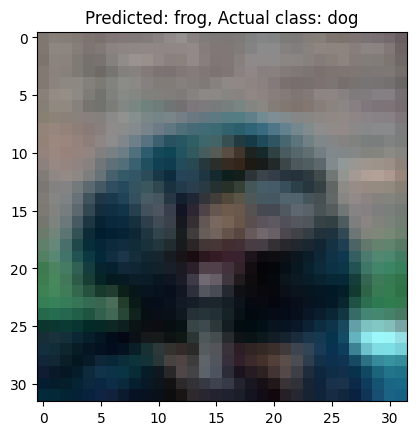

In [ ]:
import numpy as np

missed_ones = np.where(p_test != y_test)
missed_ones # it's a tuple returning (np.array,) (second argument is empty)

i = np.random.choice(missed_ones[0])
print(i)

plt.imshow(X_test[i])
plt.title(f"Predicted: {class_names[p_test[i]]}, Actual class: {class_names[y_test[i]]}")

In [ ]:
X_test[0].shape

(32, 32, 3)

# Data Augmentation & Batch Normalization



In [ ]:
i =  Input(shape = (32,32,3),) # (32,32,3)  = X_train[0].shape
x =  Conv2D(filters=32, kernel_size=(3,3),activation="relu",padding="same")(i)        # As you can see, we removed the "strides" argument so it's (1,1) default which returns the image size 
x =  BatchNormalization()(x)
x =  Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same")(x)       # As you can see, we removed the "strides" argument so it's (1,1) default which returns the image size  
x =  BatchNormalization()(x)
x =  Conv2D(filters=64, kernel_size=(3,3), activation="relu",padding="same")(x)       # As you can see, we removed the "strides" argument so it's (1,1) default which returns the image size 
x =  BatchNormalization()(x)
x =  MaxPooling2D((2, 2))(x)                                                          # MAX POOLING WITH THE ARGUMENT OF (2, 2) STATES THAT IN EACH (2,2) PART, 
                                                                                      # IT RETURNS THE ONLY MAXIMUM ELEMENT WICH WILL REDUCE THE SIZE OF IMAGE BY GIVEN ARGUMENT (FOR (2, 2) IT BECOMES (16,16,64) NOTE THAT 64 İS THE NUMBER OF FEATURE MAPS)


x =  Conv2D(filters=128, kernel_size=(3,3), activation="relu",padding="same")(x)      # As you can see, we removed the "strides" argument so it's (1,1) default which returns the image size 
x =  BatchNormalization()(x)
x =  Conv2D(filters=128, kernel_size=(3,3) ,activation="relu",padding="same")(x)      # As you can see, we removed the "strides" argument so it's (1,1) default which returns the image size 
x =  BatchNormalization()(x)
x =  MaxPooling2D((2, 2))(x)                                                          # IT RETURNS THE ONLY MAXIMUM ELEMENT WICH WILL REDUCE THE SIZE OF IMAGE BY GIVEN ARGUMENT (FOR (2, 2) IT BECOMES (8,8,128) NOTE THAT 128 İS THE NUMBER OF FEATURE MAPS)


x =  Flatten()(x)                                                                     # Since Feedforward ANN Requires 1-D Vector, flatten layers will give us a length of 8*8*128=8192 vector.  
x =  Dropout(0.2)(x)
x =  Dense(1024,activation="relu")(x)
x =  Dropout(0.2)(x)
x =  Dense(K,activation = "softmax")(x)

model = Model(i,x)

# In t his example, we used "Max Pooling" instead of "strides"
# we also used GlobalMaxPooling instad of Flatten




In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

r=model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=50)

Epoch 1/50
1563/1563 [==============================] - 32s 12ms/step - loss: 1.4766 - accuracy: 0.5220 - val_loss: 1.1987 - val_accuracy: 0.5833
Epoch 2/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9021 - accuracy: 0.6873 - val_loss: 0.8057 - val_accuracy: 0.7240
Epoch 3/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7286 - accuracy: 0.7497 - val_loss: 0.8179 - val_accuracy: 0.7226
Epoch 4/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.6027 - accuracy: 0.7927 - val_loss: 0.8376 - val_accuracy: 0.7282
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.4848 - accuracy: 0.8327 - val_loss: 0.8232 - val_accuracy: 0.7471
Epoch 6/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.3949 - accuracy: 0.8652 - val_loss: 0.7329 - val_accuracy: 0.7796
Epoch 7/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.3240 - accuracy: 0.8905 - val_loss: 0.6917 -

In [ ]:
# DATA AUGMENTATION PART
# Note: it will train when it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train,y_train,batch_size)
steps_per_epoch = X_train.shape[0] // batch_size # Steps per epoch can be calculated by the "Number of total samples in the train set // batch size"

print("Batch size = " + str(batch_size))   

r = model.fit_generator(train_generator, validation_data=(X_test,y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Batch size = 32
Epoch 1/50


<ipython-input-16-929f785d2c28>:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(X_test,y_test), steps_per_epoch=steps_per_epoch, epochs=50)


1562/1562 [==============================] - 37s 23ms/step - loss: 0.6563 - accuracy: 0.7928 - val_loss: 0.6095 - val_accuracy: 0.8085
Epoch 2/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.5092 - accuracy: 0.8349 - val_loss: 0.5125 - val_accuracy: 0.8307
Epoch 3/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.4596 - accuracy: 0.8487 - val_loss: 0.5087 - val_accuracy: 0.8353
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4350 - accuracy: 0.8563 - val_loss: 0.5337 - val_accuracy: 0.8385
Epoch 5/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.4119 - accuracy: 0.8636 - val_loss: 0.4826 - val_accuracy: 0.8439
Epoch 6/50
1562/1562 [==============================] - 36s 23ms/step - loss: 0.3896 - accuracy: 0.8722 - val_loss: 0.5568 - val_accuracy: 0.8286
Epoch 7/50
1562/1562 [==============================] - 37s 24ms/step - loss: 0.3739 - accuracy: 0.8764 - val_loss: 0.4695 - val_accura

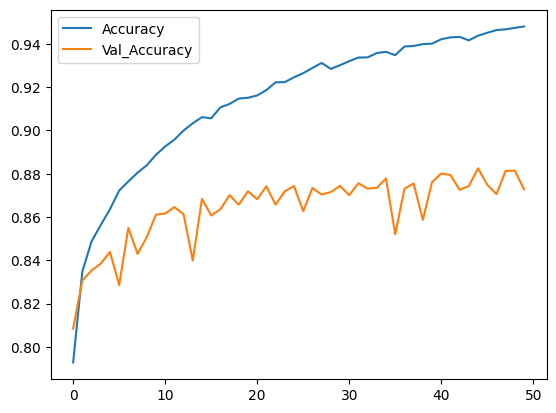

In [ ]:
from matplotlib import pyplot as plt

plt.plot(r.history["accuracy"],label="Accuracy")
plt.plot(r.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

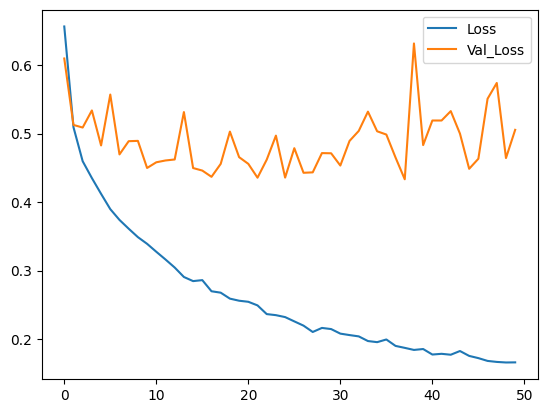

In [ ]:
from matplotlib import pyplot as plt

plt.plot(r.history["loss"],label="Loss")
plt.plot(r.history["val_loss"],label="Val_Loss")
plt.legend()